In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import cmocean


In [29]:
## Cargo climatologia de todo el periodo de clorofila MODIS 4km

ds = xr.open_dataset('../datasets/AQUA_MODIS.20020704_20230930.L3m.CU.CHL.chlor_a.4km.nc')

lon_w = -180
lon_e = 180
lat_s = -70
lat_n = 70

# lon_w = -65
# lon_e = -50
# lat_s = -50
# lat_n = -30

data = ds['chlor_a'].sel(lat=slice(lat_n, lat_s), lon=slice(lon_w, lon_e)).values
lat = ds['lat'].sel(lat=slice(lat_n, lat_s)).values
lon = ds['lon'].sel(lon=slice(lon_w, lon_e)).values


In [14]:
## Constantes para el mapa

CMIN = 0
CMAX = 5
NPOINTS = 51
levels = np.linspace(CMIN, CMAX, NPOINTS)


In [7]:
## Concatenacion de colorbars

cmap1 = plt.get_cmap('cmo.dense')
cmap2 = plt.get_cmap('cmo.algae')

NTOT = 256
CM1 = int(NTOT/2)
CM2 = NTOT - CM1

colors1 = cmap1(np.linspace(0, 1, CM1))
colors2 = cmap2(np.linspace(0, 1, CM2))

colors = np.vstack((colors1, colors2))

concatenated_cmap = mcolors.LinearSegmentedColormap.from_list('concatenated_colormap', colors)


In [44]:
10**(1.35)

22.3872113856834

In [53]:
levels = np.sort(np.logspace(-3, 1.35, 50))  # Ensure levels are sorted in increasing order
levels

array([1.00000000e-03, 1.22680492e-03, 1.50505032e-03, 1.84640314e-03,
       2.26517647e-03, 2.77892964e-03, 3.40920456e-03, 4.18242894e-03,
       5.13102442e-03, 6.29476602e-03, 7.72244995e-03, 9.47393961e-03,
       1.16226758e-02, 1.42587558e-02, 1.74927119e-02, 2.14601451e-02,
       2.63274116e-02, 3.22985982e-02, 3.96240793e-02, 4.86110155e-02,
       5.96362332e-02, 7.31620245e-02, 8.97555318e-02, 1.10112528e-01,
       1.35086592e-01, 1.65724896e-01, 2.03312118e-01, 2.49424308e-01,
       3.05994969e-01, 3.75396134e-01, 4.60537826e-01, 5.64990072e-01,
       6.93132602e-01, 8.50338488e-01, 1.04319944e+00, 1.27980221e+00,
       1.57006766e+00, 1.92616673e+00, 2.36303083e+00, 2.89897786e+00,
       3.55648031e+00, 4.36310755e+00, 5.35268182e+00, 6.56669641e+00,
       8.05605549e+00, 9.88320854e+00, 1.21247689e+01, 1.48747262e+01,
       1.82483873e+01, 2.23872114e+01])

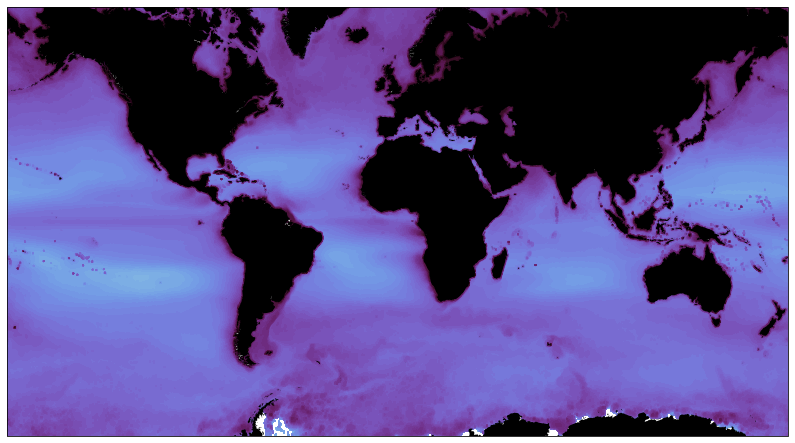

In [54]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Mercator())
               
ax.add_feature(cfeature.NaturalEarthFeature("physical", "land", "10m"),
              lw=0, alpha=1, ec='black', fc='black')
im_chl = ax.contourf(lon[::4], lat[::4], data[::4, ::4],
                      transform=ccrs.PlateCarree(), levels=levels, extend='both', 
                      cmap='cmo.dense', norm=mcolors.LogNorm(vmin=0.001, vmax=10**(1.35)))

for a in im_chl.collections:
    a.set_edgecolor("face")

fig.savefig('../exported_figs/chl_a_entire_period_MODIS.png', dpi=400, bbox_inches='tight')
fig.savefig('../exported_figs/chl_a_entire_period_MODIS.pdf', bbox_inches='tight')

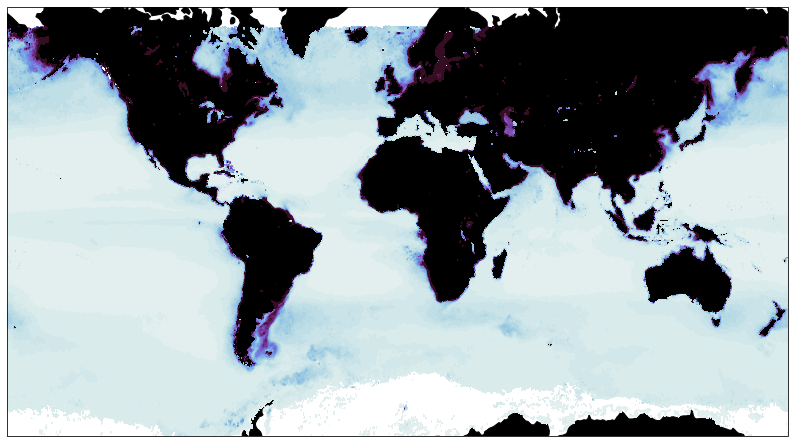

In [241]:
## Realizo mapa 

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Mercator())

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='black')
im_chl = ax.contourf(lon[::5], lat[::5], data[::5,::5], transform=ccrs.PlateCarree(), levels=levels, extend='both', cmap='cmo.dense')

fig.savefig('../exported_figs/climatology_october_2002-2022_chl_a_MODIS.png', dpi=400, bbox_inches='tight')
fig.savefig('../exported_figs/climatology_october_2002-2022_chl_a_MODIS.pdf', bbox_inches='tight')


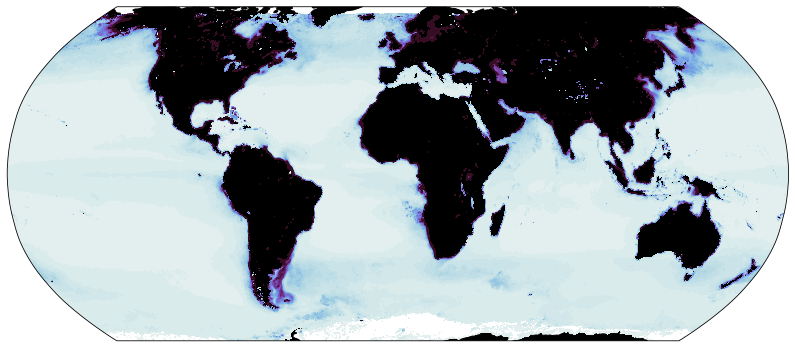

In [11]:
## Realizo mapa 

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='black')
im_chl = ax.contourf(lon[::3], lat[::3], data[::3, ::3], transform=ccrs.PlateCarree(), levels=levels, extend='both', cmap='cmo.dense')

fig.savefig('../exported_figs/climatology_october_2002-2022_chl_a_MODIS_robinson.png', dpi=400, bbox_inches='tight')
fig.savefig('../exported_figs/climatology_october_2002-2022_chl_a_MODIS_robinson.pdf', bbox_inches='tight')


In [ ]:
## Realizo mapa 

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='black')
im_chl = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), levels=levels, extend='both', cmap='GnBu_r')

fig.savefig('../exported_figs/climatology_october_2002-2022_chl_a_MODIS_robinson_deep.png', dpi=400, bbox_inches='tight')
fig.savefig('../exported_figs/climatology_october_2002-2022_chl_a_MODIS_robinson_deep.pdf', bbox_inches='tight')


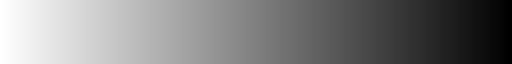

In [48]:
plt.get_cmap('binary')

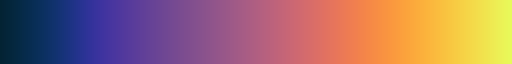

In [51]:
plt.get_cmap('cmo.thermal')